<a href="https://colab.research.google.com/github/s-c-soma/Deeplearning-CMPE-258/blob/main/Assignment_3/Assignment_3_Part_B_1_Pytorch(without_auto_differentiation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Layer Neural Network (with relu nonlinearity) Using Pytorch

# Implementation Details and Discussion

* Here, I have generated the 3d input and 2d output data first.
* Then I have built a 3 layer neural network from scrach using Pytorch with ReLU non linearity
* Here the output has 2 neurons

## Steps: 
Inside steps that is implemented in each section using Pytorch:
- Initialized the parameters for a three-layer network 
- Implemented the forward propagation module 
     - Used ACTIVATION function ReLU
     - Combined the previous steps into a new [LINEAR->ACTIVATION] forward function.
- Computed the MSE loss.
- Implemented the backward propagation module
    - Complete the linear part of a layer's backward propagation step.
    - Used the gradient of the ACTIVATE function relu_backward
    - Combine the previous steps into a new [LINEAR->ACTIVATION] backward function.
- Finally updated the parameters.
- After 2000 epochs, loss is 0.06002280116081238

## Equation of Multi Layer:
$$ Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]} $$

$$ A^{[l]} = g^{[l]}(Z^{[l]}) $$

Where $l$ is the `lth` layer.

## ExtraCredit:
* At the bottom I have plotted the data in 3d space. 
* To plot 3 dimensional data, I have reduced x into 2-d using TSNE

# Check if GPU/TPU available

In [9]:
!nvidia-smi

Mon Mar 22 00:16:24 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Colab environment

In [10]:
!python --version

Python 3.7.10


In [11]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [12]:
!pip list | grep torch

torch                         1.8.0+cu101   
torchsummary                  1.5.1         
torchtext                     0.9.0         
torchvision                   0.9.0+cu101   


# Library

In [13]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable

# Generating Data: 3D Input :: 2D Output

In [14]:
# Make non-linear data, using 3 dimensional input data and 2 output neurons

n = 200
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[5, 1, 4],[2, 1, 2]]).T
bias_true = np.array([0.5, 0.25])

# f(x) =  y = 5x + b
# f(x) = y = x^2w + b 

# y = w_0 * x_0 + w_1 * x_1 + w_2 * x_2 + b
y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], x[:, 2], y_true, label='underlying function')
  if y_true is not None:
    ax.scatter(x[:, 0], x[:, 1], x[:, 2], y_true, label='our function')
  plt.legend()

#plot_3d(x, y_true, y_pred)

x: (200, 3), weights: (3, 2), bias: (2,), y: (200, 2)


In [15]:
# Generating data of 3 dim input and 2 dim output
#torch funcs
n, d = 500, 3
x = torch.FloatTensor(n, d).uniform_(-1, 1)
weights_true = torch.tensor([[5,1,5],[1,2,1]]).float()
weights_true = torch.transpose(weights_true,0,1)
bias_true = torch.tensor([1,2])
y_true = torch.mm(x**2,weights_true) + torch.mm(x,weights_true) + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: torch.Size([500, 3]), weights: torch.Size([3, 2]), bias: torch.Size([2]), y: torch.Size([500, 2])


# Building Multi Layer NN: 3 Layer


## Loss Function (MSE)

In [16]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return torch.mean((y_pred - y_true) ** 2)

  def backward(self): 
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient

## Building Linear Layer


In [17]:
class Linear:
  #Randomly initialize weight and bias
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = torch.rand(input_dim, num_hidden)
    self.bias = torch.zeros(num_hidden,)
  
  def __call__(self, x):
    self.x = x
    return torch.mm(x, self.weights) + self.bias

  #backpass
  def backward(self, gradient):
    self.weights_gradient = torch.mm(torch.transpose(self.x,0,1), gradient)
    self.bias_gradient = gradient.sum(0)
    self.x_gradient = torch.mm(gradient, torch.transpose(self.weights,0,1))
    return self.x_gradient

  #update params
  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

## Activation Function: Non Linear 

### ReLU

In [18]:
class Relu:
    def __call__(self, input_):
      self.input_ = input_
      self.output = torch.clamp(self.input_, min=0, out=None)
      return self.output
    
    def backward(self, output_gradient):
      self.input_gradient = (self.input_ > 0) * output_gradient 
      return self.input_gradient

### Sigmoid

In [19]:
#not using it currenty; created for testing
def sigmoid(x):
    return 1/(1 + np.exp(-x))
def relu(x):
    return np.maximum(x, 0)

### Testing

In [20]:
tmp_x = np.array([-1.2, -2.0, 1.3])

sx = sigmoid(tmp_x)
rx = relu(tmp_x)

print(sx, rx)

[0.23147522 0.11920292 0.78583498] [0.  0.  1.3]


## Model Class Architecture


In [21]:
#for 3 layer
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu1 = Relu()
    self.linear2 = Linear(num_hidden, 12) # Pick 12 as number of neurons in hidden layer
    self.relu2 = Relu()
    self.linear3 = Linear(12,2)
  
  # Forward pass
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3
  
  def backward(self, output_gradient):
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu1.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    return linear1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

# Model Training and Validation 

In [24]:
# Training
def fit(x, y, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    if epoch % 20 == 0:
      print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

loss = MSE()
model = Model(d, 20)
y_pred = model(x)
fit(x, y_true, model=model, loss=loss, lr=0.0035, num_epochs=2000)

Epoch 0, loss 210.9355926513672
Epoch 20, loss 5.243797302246094
Epoch 40, loss 2.9111924171447754
Epoch 60, loss 2.0035176277160645
Epoch 80, loss 1.5136990547180176
Epoch 100, loss 1.1864876747131348
Epoch 120, loss 0.9493973255157471
Epoch 140, loss 0.7751586437225342
Epoch 160, loss 0.6469901204109192
Epoch 180, loss 0.5504721403121948
Epoch 200, loss 0.47612279653549194
Epoch 220, loss 0.41848257184028625
Epoch 240, loss 0.3735014796257019
Epoch 260, loss 0.33762893080711365
Epoch 280, loss 0.30824679136276245
Epoch 300, loss 0.28380894660949707
Epoch 320, loss 0.2628931403160095
Epoch 340, loss 0.2452266365289688
Epoch 360, loss 0.230190709233284
Epoch 380, loss 0.2171308547258377
Epoch 400, loss 0.20576247572898865
Epoch 420, loss 0.19572743773460388
Epoch 440, loss 0.1868814378976822
Epoch 460, loss 0.17902176082134247
Epoch 480, loss 0.1719660758972168
Epoch 500, loss 0.16563721001148224
Epoch 520, loss 0.15997575223445892
Epoch 540, loss 0.15489745140075684
Epoch 560, loss 0.

# Visualization: Training Data and Prediction

## Plot:: Comparison True vs Predicted Value

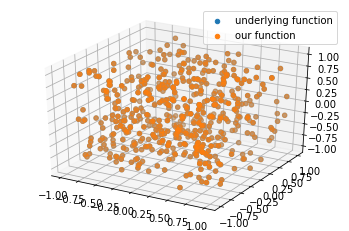

In [25]:
plot_3d(x, y_true, y_pred)

Text(0.5, 1.0, 'Plot:: Comparison True vs Predicted Value')

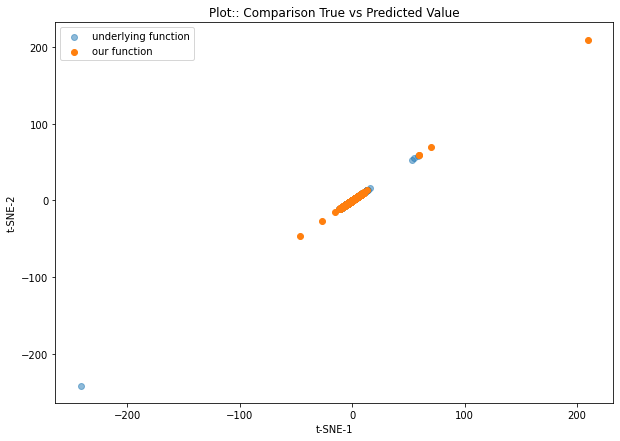

In [26]:
import numpy as np
from sklearn.manifold import TSNE

view = TSNE(n_components=3, perplexity=10,learning_rate=200,random_state=123).fit_transform(x, y_pred)

def plot_tsne(x, y_true, y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(view[:,0], view[:,0], alpha=0.5, label='underlying function')
  if y_true is not None:
    plt.scatter(view[:, 1], view[:, 1], label='our function')
  plt.xlabel('t-SNE-1')
  plt.ylabel('t-SNE-2')
  # plt.plot(x, y_true[:,0], y_true[:,0], color='blue', alpha=0.5, label='True Value')
  plt.legend()

plot_tsne(x, y_true, y_pred)
plt.title("Plot:: Comparison True vs Predicted Value")

## ExtraCredit: t-SNE 3D Plot

In [27]:
def plot_intereactive_3d(x, y, y_pred=None):
  import plotly.graph_objects as go # Use plotly to create interactive graph

  fig = go.Figure()
  fig.add_trace(go.Scatter3d(x = x[:,0],
                    y = x[:,1],
                    z = y.reshape([-1]),
                    opacity=0.5, mode='markers', name='Underlying Function'
                    ))
 
  if y_pred is not None:
    fig.add_trace(go.Scatter3d(x = x[:,0],
                   y = x[:,1],
                   z = y_pred.reshape([-1]),
                   opacity=0.5, mode='markers', name='Predicted Function'
                  ))
    
  fig.update_layout(scene = dict(
                    xaxis_title='X1',
                    yaxis_title='X2',
                    zaxis_title='Y'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
  fig.show()

In [28]:
def plot_intereactive_3d(x, y, y_pred=None):
  import plotly.graph_objects as go # Use plotly to create interactive graph

  fig = go.Figure()
  fig.add_trace(go.Scatter3d(x = x[:,0],
                    y = x[:,1],
                    z = y.reshape([-1]),
                    opacity=0.5, mode='markers', name='Underlying Function'
                    ))
 
  if y_pred is not None:
    fig.add_trace(go.Scatter3d(x = x[:,0],
                   y = x[:,1],
                   z = y_pred.reshape([-1]),
                   opacity=0.5, mode='markers', name='Predicted Function'
                  ))
    
  fig.update_layout(scene = dict(
                    xaxis_title='X1',
                    yaxis_title='X2',
                    zaxis_title='Y'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
  fig.show()

In [29]:
from sklearn.manifold import TSNE
X_reduced = TSNE(n_components=2).fit_transform(x)
y_true_reduced = TSNE(n_components=1).fit_transform(y_true)
y_pred_reduced = TSNE(n_components=1).fit_transform(model(x))
print(f'X_reduced: {X_reduced.shape}, y_true_reduced: {y_true_reduced.shape}, y_pred_reduced: {y_pred_reduced.shape}')
plot_intereactive_3d(X_reduced,y_true_reduced,y_pred_reduced)

X_reduced: (500, 2), y_true_reduced: (500, 1), y_pred_reduced: (500, 1)
